## 1. Setup and Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2. Positive Correlation
When two variables increase together, they have a positive correlation. An example is a relationship between a person’s height and weight.

Spearman correlation: 0.9393939393939393


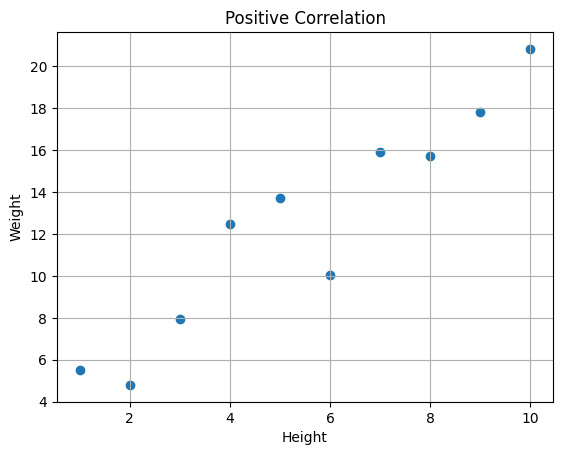

In [7]:
# Generate data
np.random.seed(0)
x = np.arange(1, 11)  # Independent variable (e.g., height)
y = x * 2 + np.random.normal(0, 2, 10)  # Dependent variable (e.g., weight)

df = pd.DataFrame({'x': x, 'y': y})
# Calculate Spearman correlation
correlation = df['x'].rank().corr(df['y'].rank())
print(f"Spearman correlation: {correlation}")

# Scatter plot to visualize the correlation
plt.scatter(x, y)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Positive Correlation')
plt.grid()
plt.show()

In this plot, you will see that as x (height) increases, y (weight) also increases, indicating a positive correlation.

## 3. Negative Correlation
A negative correlation occurs when one variable increases as the other decreases. An example might be the relationship between the number of hours a student spends playing video games and their exam scores.

Spearman correlation: -1.0


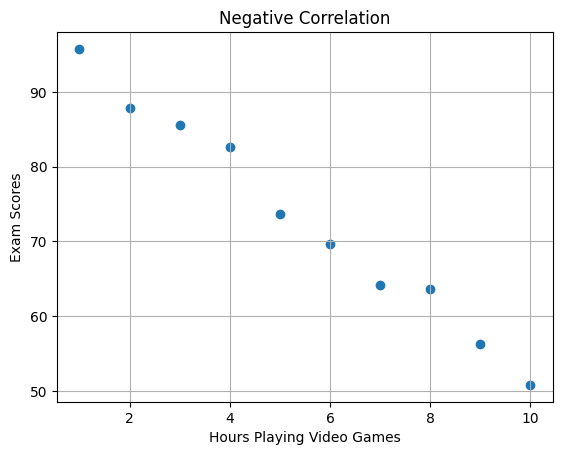

In [20]:
# Generate data
x = np.arange(1, 11)  # Independent variable (e.g., hours playing video games)
y = 100 - x * 5 + np.random.normal(0, 2, 10)  # Dependent variable (e.g., exam scores)

# Calculate ranks
x_rank = np.argsort(np.argsort(x))
y_rank = np.argsort(np.argsort(y))

# Calculate Spearman correlation
# did not use scipy spearman because compatibility issues
n = len(x)
d = np.sum((x_rank - y_rank)**2)
correlation = 1 - (6 * d) / (n * (n**2 - 1))

print(f"Spearman correlation: {correlation}")

# Scatter plot to visualize the correlation
plt.scatter(x, y)
plt.grid()
plt.xlabel('Hours Playing Video Games')
plt.ylabel('Exam Scores')
plt.title('Negative Correlation')
plt.show()

In this plot, as x (hours spent playing video games) increases, y (exam scores) decreases, showing a negative correlation.

## 4. No Correlation
When there is no correlation, the two variables are independent of each other. An example might be the relationship between shoe size and exam scores—there’s no logical connection between these two.

Spearman correlation: -0.1515151515151515


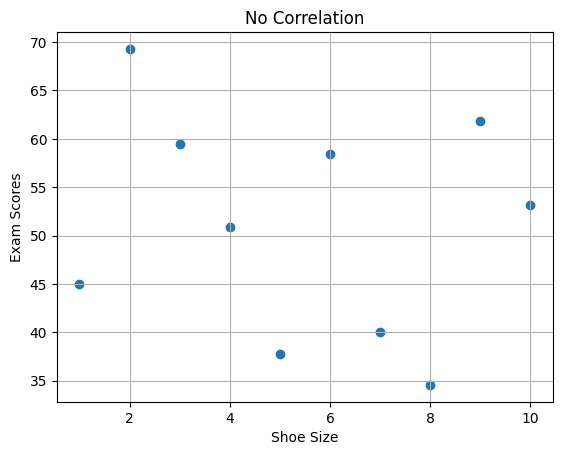

In [24]:
# Generate data
x = np.arange(1, 11)  # Independent variable (e.g., shoe size)
y = np.random.normal(50, 10, 10)  # Dependent variable (e.g., exam scores)

df = pd.DataFrame({'x': x, 'y': y})
correlation = df['x'].rank().corr(df['y'].rank())
print(f"Spearman correlation: {correlation}")

# Create scatter plot
plt.scatter(x, y)
plt.grid()
plt.xlabel('Shoe Size')
plt.ylabel('Exam Scores')
plt.title('No Correlation')
plt.show()

In this case, the data points are randomly scattered, showing no clear relationship between x (shoe size) and y (exam scores), indicating no correlation.

## 5. Correlation Matrix and Heatmap
Sometimes, you want to find the correlation between multiple variables in a dataset. You can use a correlation matrix to show how all the variables relate to each other.

           Variable1  Variable2  Variable3  Variable4
Variable1   1.000000  -0.009976  -0.277418  -0.243610
Variable2  -0.009976   1.000000  -0.069449  -0.182356
Variable3  -0.277418  -0.069449   1.000000  -0.419603
Variable4  -0.243610  -0.182356  -0.419603   1.000000


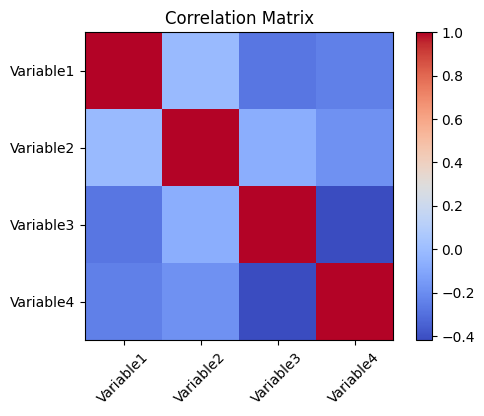

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

In [34]:
# Generate a dataset with multiple variables
data = {
    'Variable1': np.random.rand(10),
    'Variable2': np.random.rand(10) * 100,
    'Variable3': np.arange(10),
    'Variable4': np.random.rand(10) * -1
}

# Create a DataFrame
df = pd.DataFrame(data)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using matplotlib
plt.figure(figsize=(6, 4))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()
plt.tight_layout

In the heatmap:

- The color intensity shows the strength of the correlation.
- Red indicates positive correlation, blue indicates negative correlation, and white represents no correlation.

## 6. Linear Regression for Correlation
When you have a positive or negative correlation, it often helps to fit a line through the data to better understand the relationship. This line can be generated using linear regression.

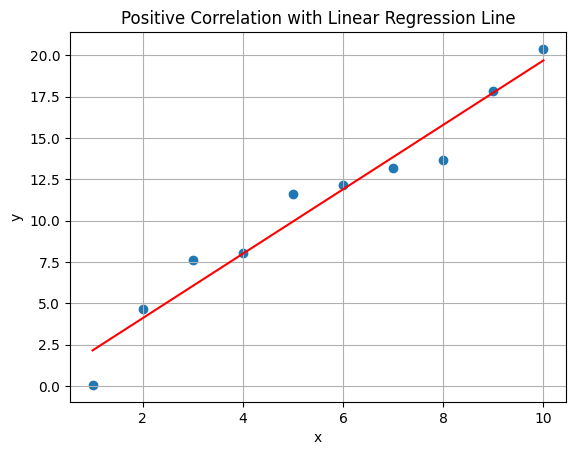

In [39]:
#from sklearn.linear_model import LinearRegression

# Generate the data
x = np.arange(1, 11)
y = x * 2 + np.random.normal(0, 2, 10)
x = x.reshape(-1, 1)

# Calculate the coefficients
x_mean = np.mean(x)
y_mean = np.mean(y)
slope = np.sum((x[:, 0] - x_mean) * (y - y_mean)) / np.sum((x[:, 0] - x_mean)**2)
intercept = y_mean - slope * x_mean

# Predict the line
y_pred = slope * x + intercept

# Scatter plot with regression line
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Positive Correlation with Linear Regression Line')
plt.show()

## 7. Loading the Dataset
We will load the dataset and take a look at the first few rows.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset


# Display the first few rows of the dataset



   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

## 8. Bar Plot: Sales by Region
We can create a bar plot to visualize total sales by region. This gives insight into which regions are performing best.

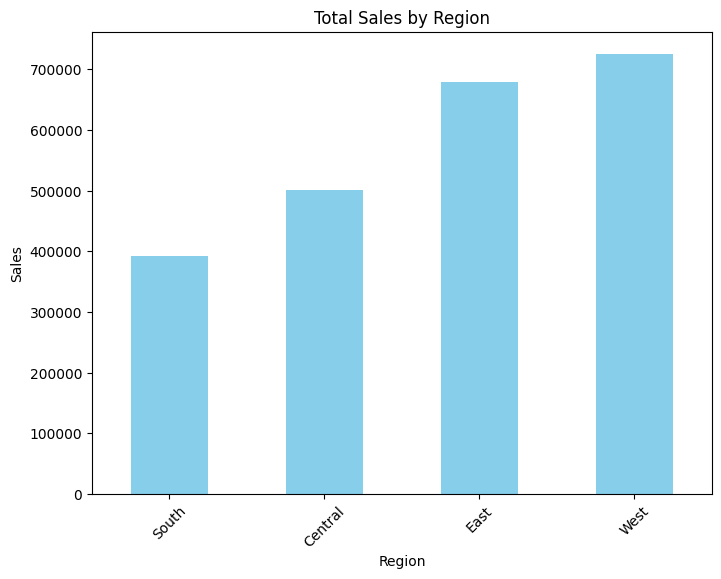

In [18]:
# Calculate total sales by region


# Bar plot for sales by region


## 9. Line Plot: Sales Over Time
Line plots are great for showing trends over time, such as sales growth or decline. We will convert the Order Date to a datetime object and then group by month to see how sales have trended over time.

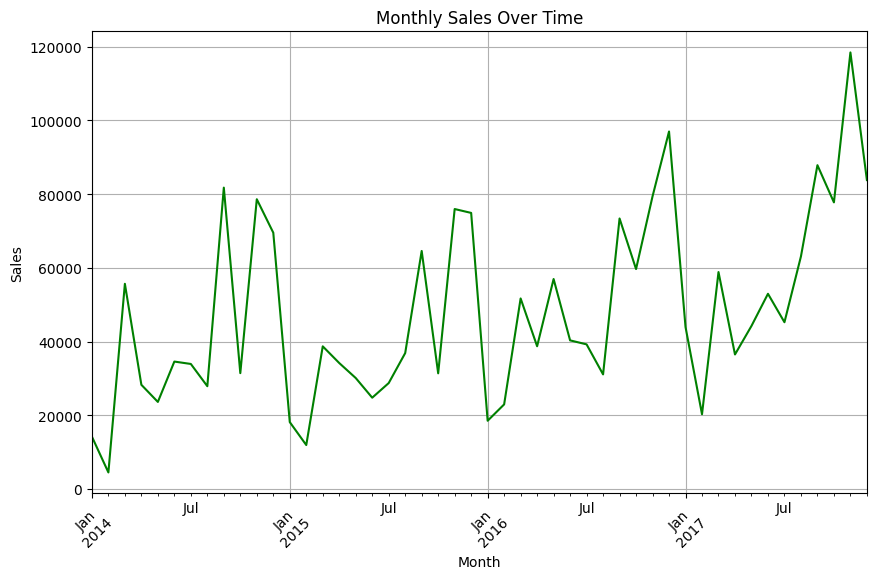

In [19]:
# Convert 'Order Date' to datetime


# Group sales by month

# Plot sales over time



## 10. Scatter Plot: Profit vs Sales
A scatter plot can help us identify if there is a relationship between profit and sales.

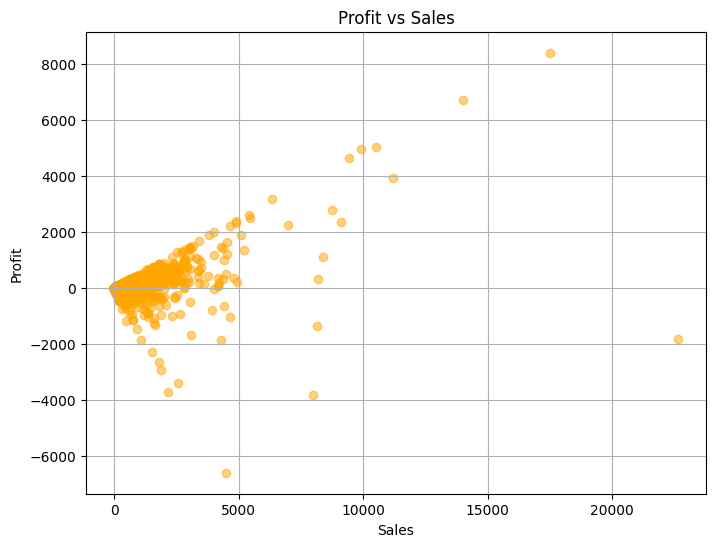

In [20]:
# Scatter plot for profit vs sales



## 11. Box Plot: Profit by Category
A box plot can show the distribution of profit across different product categories, which helps in understanding which categories have the most variability in profit.

<Figure size 1000x600 with 0 Axes>

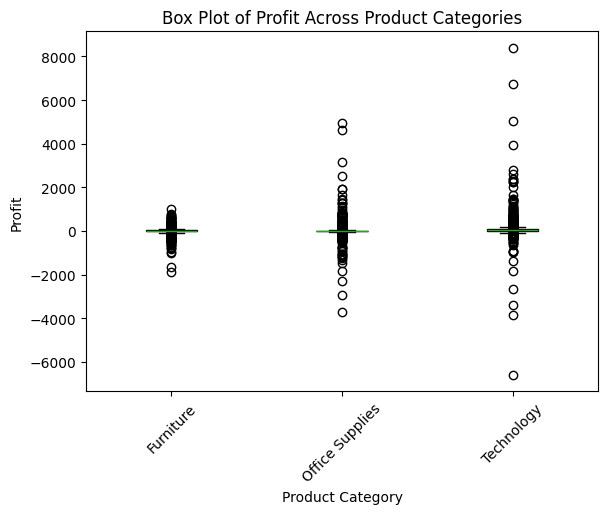

In [22]:
# Create the box plot for Profit across different Product Categories


# Customize the plot



## 12. Pie Chart: Sales Distribution by Segment
Pie charts are useful for showing proportions. Here, we’ll visualize the sales distribution by customer segment (e.g., Consumer, Corporate, Home Office).

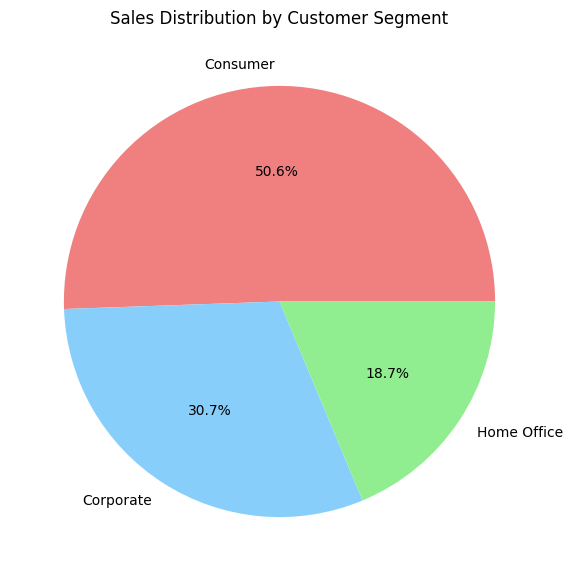

In [24]:
# Calculate sales by segment


# Pie chart for sales distribution by segment



## 13. Heatmap: Correlation Between Variables
We can create a heatmap to visualize the correlation between key numerical variables, such as sales, profit, discount, and quantity.

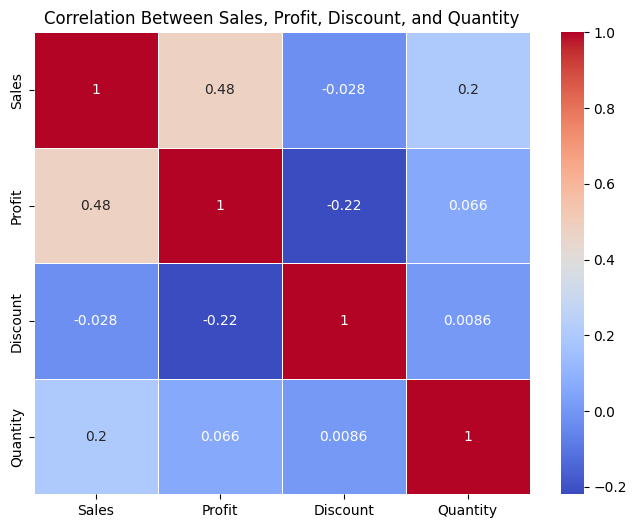

In [25]:
# Calculate correlation matrix

# Heatmap of the correlation matrix


## 14. Bar Plot: Top 10 Customers by Sales
Understanding who your top customers are is important for business analysis. Let's visualize the top 10 customers by total sales.

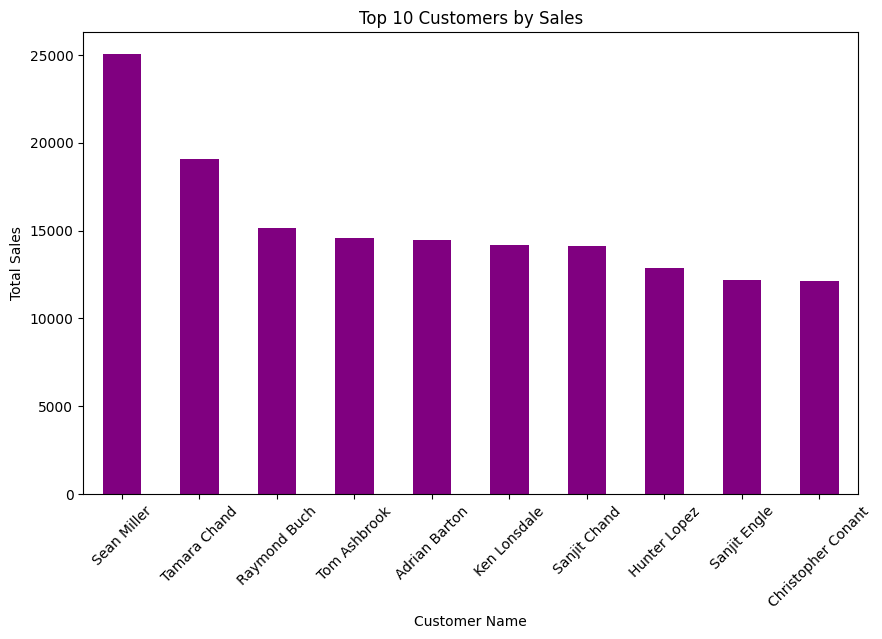

In [26]:
# Calculate total sales by customer


# Bar plot for top 10 customers



## 15. Time Series: Monthly Profit Trend
Tracking profit over time helps businesses understand profitability trends. Let's visualize monthly profit.

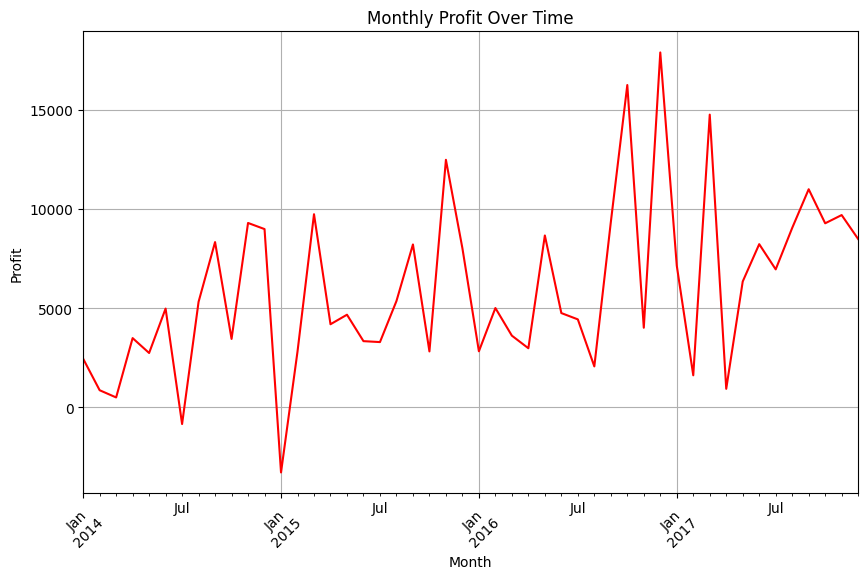

In [28]:
# Group profit by month

# Plot profit over time



## 16. Subplots: Multiple Visualizations in One Figure
Finally, let’s create a dashboard that combines multiple visualizations into a single figure, which is useful for business reports.

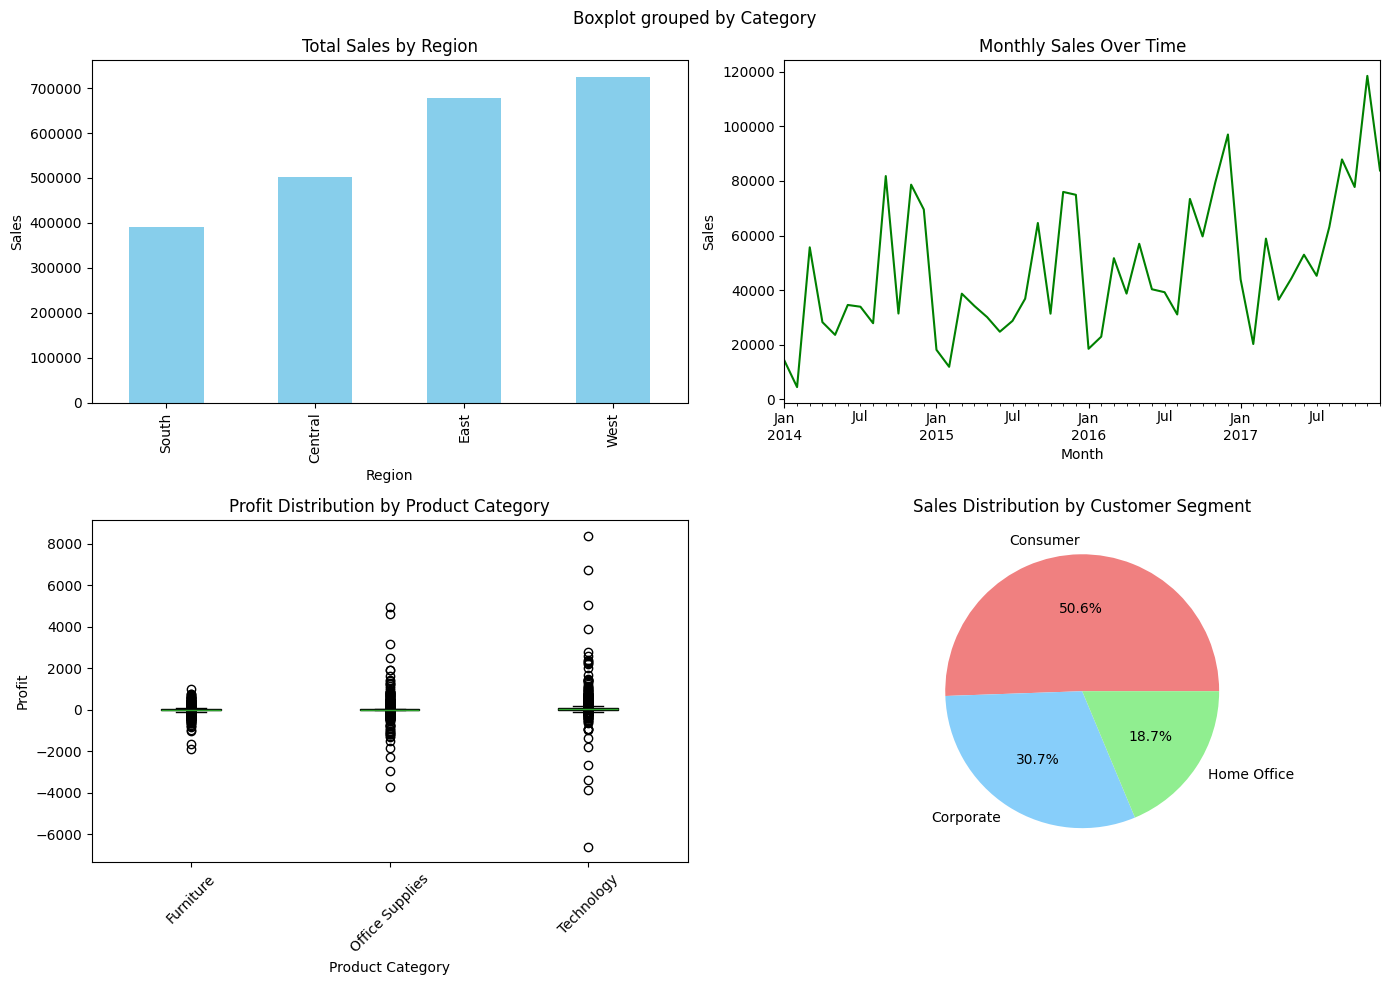

In [31]:
# Create subplots


# Bar plot for sales by region

# Line plot for monthly sales


# Plot 1: Box plot for Profit across Product Categories


# Pie chart for sales distribution by segment


# Adjust layout

